In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

k_values = [1, 3, 7, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"For k={k}:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

For k=1:
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

For k=3:
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Fo

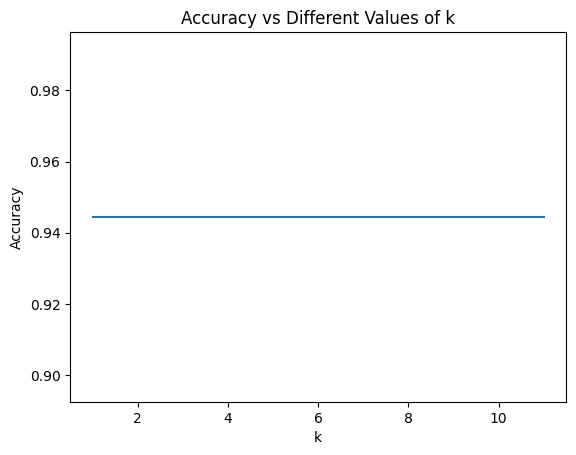

In [4]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Different Values of k')
plt.show()

Part B: Naive Bayes on Fake News Dataset

In [9]:
import pandas as pd
import string

# Simple stopword list (since NLTK not assumed available)
stopwords = ['a', 'an', 'the', 'and', 'or', 'but', 'if', 'then', 'to', 'of', 'in', 'on', 'at', 'by', 'for', 'with', 'about', 'as', 'is', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'shall', 'should', 'can', 'could', 'may', 'might', 'must', 'am', 'are', 'not', 'no', 'yes', 'very', 'just', 'so']

def preprocess(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stopwords]
    return ' '.join(words)

# Assuming single CSV with fake and real news labeled (e.g., 'news.csv' with 'text' and 'label' columns, label=0 for fake, 1 for real)
data = pd.read_csv('data/news.csv')  # Replace 'news.csv' with actual file name if different
data['label'] = data['label'].map({'FAKE': 0, 'REAL': 1})  # If labels are strings like 'fake'/'real', map to 0/1; skip if already numeric
data['processed'] = data['text'].apply(preprocess)

# Check the first few rows
data.head()

,Unnamed: 0,title,text,label,processed
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,us secretary state john f kerry said monday th...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,— kaydee king kaydeeking november 9 2016 lesso...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,its primary day new york frontrunners hillary ...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['processed']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
y_pred_mnb = mnb.predict(X_test_vec)

print("Multinomial NB:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Precision:", precision_score(y_test, y_pred_mnb))
print("Recall:", recall_score(y_test, y_pred_mnb))
print("F1-Score:", f1_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))

Multinomial NB:
Accuracy: 0.8263614838200474
Precision: 0.7467608951707891
Recall: 0.9921752738654147
F1-Score: 0.8521505376344086
Confusion Matrix:
 [[413 215]
 [  5 634]]


In [12]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)
y_pred_bnb = bnb.predict(X_test_vec)

print("Bernoulli NB:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Precision:", precision_score(y_test, y_pred_bnb))
print("Recall:", recall_score(y_test, y_pred_bnb))
print("F1-Score:", f1_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))

Bernoulli NB:
Accuracy: 0.8184688239936859
Precision: 0.859402460456942
Recall: 0.7652582159624414
F1-Score: 0.8096026490066225
Confusion Matrix:
 [[548  80]
 [150 489]]
